In [2]:
import numpy as np
import theano
theano.config.floatX='float32'
import theano.tensor as T
import lasagne
from lasagne.layers import *
import pickle
from tqdm import tqdm_notebook
from librosa import load, logamplitude
from librosa.feature import melspectrogram
from multiprocessing import Pool
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Let's start!


## Get data

Get spectrogram, divide by 21 - euristic number of samples nns were trained on.

In [7]:
def get_spectrogram(path):
    """Строим спектограмму из wav файла"""
    # Librosa seems to work only with files with sampling frequency >= 44,1 кГц
    y, sr = load(path)
    S = melspectrogram(y, sr=sr, n_mels=100)
    log_S = logamplitude(S, ref_power=np.max)
    return log_S

file_name = os.listdir("./test")
spectrogram = get_spectrogram("./test/" + file_name[0])

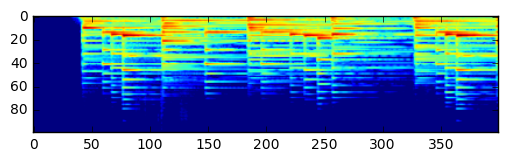

In [21]:
random_num = 400 
plt.imshow(spectrogram[:, :random_num])

## So the idea is...

There are 5 CNNs for notes recognition, there are 88 notes on piano keyboard to recognize. Empiricaly split piano keyboard on 4 sections, train one CNN for each section and one for the whole range.

In [4]:
input_X, target_y = T.tensor3("X", dtype='float32'), T.tensor3("y", dtype='int32')

up_nn = lasagne.layers.InputLayer(shape=(None, X.shape[1], X.shape[2]), input_var=input_X/80.) 
up_nn = lasagne.layers.Conv1DLayer(up_nn, 50, 6) #That number of filtera works better for this nn
up_nn = lasagne.layers.MaxPool1DLayer(up_nn, 3)
up_nn = lasagne.layers.Conv1DLayer(up_nn, 50, 4) 
up_nn = lasagne.layers.Conv1DLayer(up_nn, 88, 1,nonlinearity=T.nnet.sigmoid)
assert up_nn.output_shape[1:] == y_train.shape[1:],"up_nn: wrong output shape" 


mup_nn = lasagne.layers.InputLayer(shape=(None, X.shape[1], X.shape[2]), input_var=input_X/80.)
mup_nn = lasagne.layers.Conv1DLayer(mup_nn, 64, 6)
mup_nn = lasagne.layers.MaxPool1DLayer(mup_nn, 3)
mup_nn = lasagne.layers.Conv1DLayer(mup_nn, 64, 4) 
mup_nn = lasagne.layers.Conv1DLayer(mup_nn, 88, 1,nonlinearity=T.nnet.sigmoid)
assert mup_nn.output_shape[1:] == y_train.shape[1:],"mup_nn: wrong output shape"


mdown_nn = lasagne.layers.InputLayer(shape=(None, X.shape[1], X.shape[2]), input_var=input_X/80.)
mdown_nn = lasagne.layers.Conv1DLayer(mdown_nn, 64, 6)
mdown_nn = lasagne.layers.MaxPool1DLayer(mdown_nn, 3)
mdown_nn = lasagne.layers.Conv1DLayer(mdown_nn, 64, 4) 
mdown_nn = lasagne.layers.Conv1DLayer(mdown_nn, 88, 1,nonlinearity=T.nnet.sigmoid)
assert mdown_nn.output_shape[1:] == y_train.shape[1:],"mdown_nn: wrong output shape"


down_nn = lasagne.layers.InputLayer(shape=(None, X.shape[1], X.shape[2]), input_var=input_X/80.) 
down_nn = lasagne.layers.Conv1DLayer(down_nn, 64, 6)
down_nn = lasagne.layers.MaxPool1DLayer(down_nn, 3)
down_nn = lasagne.layers.Conv1DLayer(down_nn, 64, 4) 
down_nn = lasagne.layers.Conv1DLayer(down_nn, 88, 1,nonlinearity=T.nnet.sigmoid)
assert down_nn.output_shape[1:] == y_train.shape[1:],"down_nn: wrong output shape"


NameError: name 'X' is not defined